In [1]:
dataset_path = 'data/mini-wiki.vec'
with open(dataset_path, 'r') as fi, open('data/O_NGT/objects.tsv', 'w') as fov,open('data/O_NGT/words.tsv', 'w') as fow:
    n, dim = map(int, fi.readline().split())
    fov.write('{0}\t{1}\n'.format(n, dim)) # viết 0 ~ n, 1~dim
    for line in fi:
        tokens = line.rstrip().split(' ')
        fow.write(tokens[0] + '\n')
        fov.write('{0}\n'.format('\t'.join(tokens[1:]))) # Lấy từ vị trí 1 trở đi

In [2]:
import ngtpy

index_path = 'data/O_NGT/index'
with open('data/O_NGT/objects.tsv', 'r') as fin:
    n, dim = map(int, fin.readline().split()) # Phải có dòng kiểu count để đếm bao nhiêu dim n cho chính xác
    print("n :",n)
    
    ngtpy.create(index_path, dim, distance_type='Cosine') # create an index
    index = ngtpy.Index(index_path) # open the index
    print('inserting objects...')
    for line in fin:
        print("line ", line)
        object = list(map(float, line.rstrip().split('\t')))
        index.insert(object) # insert objects
print('building objects...')
index.build_index()
print('saving the index...')
index.save()

n : 999994
inserting objects...
line  0.0203	-0.0123	-0.0076	0.0187	0.0173	-0.0052	0.0147	0.1364	-0.0435	0.0033	-0.0255	-0.0311	0.0307	-0.0088	-0.0108	-0.0031	-0.0014	0.0138	-0.0206	0.0074	0.0210	-0.0138	0.0859	0.0425	0.0037	0.0394	0.0277	0.0174	-0.0232	0.0083	-0.0142	-0.0278	0.0041	0.0807	0.1149	0.0780	-0.0944	0.0052	-0.0048	-0.0167	-0.0362	-0.0601	0.0082	0.0264	-0.0053	0.0260	-0.0027	-0.0403	0.0420	0.0304	-0.0542	-0.0202	0.0349	0.0100	0.0917	0.0487	0.0669	-0.0182	0.0035	-0.0418	0.0160	-0.0236	-0.3184	0.0234	0.0766	-0.0002	0.0158	-0.0145	-0.0328	-0.0241	-0.0579	0.0200	0.0239	-0.0174	-0.0147	-0.0235	0.0525	0.2441	0.0051	-0.0001	-0.0161	-0.1470	-0.1094	-0.0444	-0.0000	0.0002	-0.0118	-0.1224	-0.0018	0.0077	0.0124	0.1155	0.0983	-0.0906	0.0561	0.0198	-0.0336	-0.0192	0.0270	0.0193	-0.0627	0.0113	-0.0063	0.0193	0.0026	0.1591	-0.0104	0.0004	0.0029	-0.0109	0.0135	0.1391	-0.0546	-0.0515	-0.0131	0.0246	-0.0240	-0.0060	0.4522	0.0103	0.0065	0.0066	0.0061	-0.1056	-0.0813	-0.0269	-0.0265	0.1897	0.02

In [4]:
import ngtpy

print('loading words...')
with open('data/O_NGT/words.tsv', 'r') as fin:
    words = list(map(lambda x: x.rstrip('\n'), fin.readlines()))

index = ngtpy.Index('data/O_NGT/index', zero_based_numbering = False) # open index
query_id = 1
query_object = index.get_object(query_id) # get the object for a query

print('query_object: ', query_object)
result = index.search(query_object) # aproximate nearest neighbor search
print('Query={}'.format(words[query_id - 1]))
print('Rank\tID\tDistance\tWord')
for rank, object in enumerate(result):
    print('{}\t{}\t{:.6f}\t{}'.format(rank + 1, object[0], object[1], words[object[0] - 1]))
    if rank+1 == 10:
        break

loading words...
query_object:  [0.0203000009059906, -0.012299999594688416, -0.007600000128149986, 0.018699999898672104, 0.01730000041425228, -0.005200000014156103, 0.014700000174343586, 0.1363999992609024, -0.04349999874830246, 0.0032999999821186066, -0.025499999523162842, -0.031099999323487282, 0.030700000002980232, -0.008799999952316284, -0.01080000028014183, -0.003100000089034438, -0.00139999995008111, 0.013799999840557575, -0.020600000396370888, 0.007400000002235174, 0.020999999716877937, -0.013799999840557575, 0.08590000122785568, 0.042500000447034836, 0.003700000001117587, 0.039400000125169754, 0.027699999511241913, 0.017400000244379044, -0.02319999970495701, 0.008299999870359898, -0.0142000000923872, -0.027799999341368675, 0.004100000020116568, 0.08070000261068344, 0.11490000039339066, 0.07800000160932541, -0.09440000355243683, 0.005200000014156103, -0.004800000227987766, -0.016699999570846558, -0.03620000183582306, -0.060100000351667404, 0.008200000040233135, 0.026399999856948

In [8]:
import numpy as np
from PIL import Image
import glob
import torch
import clip
import numpy as np
import matplotlib.pyplot as plt
import math
import clip
from langdetect import detect
import googletrans
import translate
import ngtpy


device = "cuda"
model, preprocess = clip.load("ViT-B/16", device=device)

des_path =  "data/CLIP_Features/"
paths = "data/KeyFramesC00_V00/"

video_paths = sorted(glob.glob(f"{paths}/*/"))
video_paths = ['/'.join(i.split('/')[:-1]) for i in video_paths]

# os.makedirs(des_path, exist_ok=True)
re_shape = [] #
re_dirs = [] #
re_feats = [] #
device = "cuda"

# Loop qua hết các paths
for vd_path in video_paths:
  print(vd_path)
  keyframe_paths = glob.glob(f'{vd_path}/*.jpg')
  keyframe_paths = sorted(keyframe_paths, key=lambda x : x.split('/')[-1].replace('.jpg',''))

  # Loop qua hết các ảnh
  for keyframe_path in keyframe_paths:
    image = preprocess(Image.open(keyframe_path)).unsqueeze(0).to(device)

    with torch.no_grad():
        image_feats = model.encode_image(image)

    image_feats /= image_feats.norm(dim=-1, keepdim=True)
    image_feats = image_feats.detach().cpu().numpy().astype(np.float16).flatten() 

    re_dirs.append(np.array(keyframe_path))
    re_feats.append(image_feats)
  print("Len dirs", len(re_dirs))

  
re_shape.append(np.array([len(re_feats), image_feats.shape[0]]))


outfile = f'{des_path}/Imgs_Encode.tsv'
# np.save(outfile, re_feats)
np.savetxt(outfile, re_feats, delimiter = "\t")

outfile_dirs = f'{des_path}/Imgs_dirs.tsv'
np.savetxt(outfile_dirs, re_dirs, delimiter = "\t", fmt = "%s")

shape_np = f'{des_path}/shape_arr.tsv'
np.savetxt(shape_np, re_shape, delimiter = "\t",fmt ="%i")
  

data/KeyFramesC00_V00/C00_V0000
Len dirs 1104
data/KeyFramesC00_V00/C00_V0001
Len dirs 2299


In [9]:
index_path = 'data/CLIP_Features/CLIP_Index'
object_path = 'data/CLIP_Features/Imgs_Encode.tsv'
with open('/home/toonies/AI-Challenge/PLIP-ELASTICSEARCH/data/CLIP_Features/shape_arr.tsv', 'r') as shape_arrs, open(object_path, 'r') as fin:
    n, dim = map(int, shape_arrs.readline().split()) # Phải có dòng kiểu count để đếm bao nhiêu dim n cho chính xác
    print("n :",n)
    ngtpy.create(index_path, dim, distance_type='Cosine') # create an index
    index = ngtpy.Index(index_path) # open the index
    print('inserting objects...')

    for line in fin:
        # print("line ", line)
        object = list(map(float, line.rstrip().split('\t')))
        index.insert(object) # insert objects
print('building objects...')
index.build_index()
print('saving the index...')
index.save()

n : 2299
inserting objects...
building objects...
saving the index...


In [10]:
class Translation:
    def __init__(self, from_lang='vi', to_lang='en', mode='google'):
        # The class Translation is a wrapper for the two translation libraries, googletrans and translate. 
        self.__mode = mode
        self.__from_lang = from_lang
        self.__to_lang = to_lang

        if mode in 'googletrans':
            self.translator = googletrans.Translator()
        elif mode in 'translate':
            self.translator = translate.Translator(from_lang=from_lang,to_lang=to_lang)

    def preprocessing(self, text):
        """
        It takes a string as input, and returns a string with all the letters in lowercase
        :param text: The text to be processed
        :return: The text is being returned in lowercase.
        """
        return text.lower()

    def __call__(self, text):
        """
        The function takes in a text and preprocesses it before translation
        :param text: The text to be translated
        :return: The translated text.
        """
        text = self.preprocessing(text)
        return self.translator.translate(text) if self.__mode in 'translate' \
                else self.translator.translate(text, dest=self.__to_lang).text
    
def show_images(image_paths):
    fig = plt.figure(figsize=(15, 10))
    columns = int(math.sqrt(len(image_paths)))
    rows = int(np.ceil(len(image_paths)/columns))

    for i in range(1, columns*rows +1):
        img = plt.imread(image_paths[i - 1])
        ax = fig.add_subplot(rows, columns, i)
        ax.set_title('/'.join(image_paths[i - 1].split('/')[-3:]))

        plt.imshow(img)
        plt.axis("off")
        
    plt.show()

def text_search(text):
    model, preprocess = clip.load("ViT-B/16", device="cuda")
    trans = Translation()
    text = trans(text)

    ###### TEXT FEATURES EXACTING ######
    text = clip.tokenize([text]).to("cuda")  
    text_features = model.encode_text(text).cpu().detach().numpy().astype(np.float32)
    return text_features

In [24]:
import time

start_time = time.time()
text = "Người phụ nữ đeo kính"
text = list(text_search(text)[0])
execute_time = time.time() - start_time
print("Text encoder execution time: ", execute_time, "s")

Text encoder execution time:  3.373178243637085 s


In [25]:
start_time = time.time()

print('loading words...')
with open('data/CLIP_Features/Imgs_dirs.tsv', 'r') as fin:
    words = list(map(lambda x: x.rstrip('\n'), fin.readlines()))

index = ngtpy.Index('data/CLIP_Features/CLIP_Index', zero_based_numbering = False) # open index

img_arr = []
# print('query_object: ', text)
result = index.search(text) # aproximate nearest neighbor search
print('Rank\tID\tDistance\tWord')
for rank, object in enumerate(result):
    print('{}\t{}\t{:.6f}\t{}'.format(rank + 1, object[0], object[1], words[object[0] - 1]))
    img_arr.append(words[object[0] - 1])
    if rank+1 == 9:
        break
print("#############################################################################")
execute_time = time.time() - start_time
print("Vector search execution time: ", execute_time, "s")

loading words...
Rank	ID	Distance	Word
1	1731	0.706755	data/KeyFramesC00_V00/C00_V0001/013832.jpg
2	1560	0.722166	data/KeyFramesC00_V00/C00_V0001/010285.jpg
3	1277	0.722385	data/KeyFramesC00_V00/C00_V0001/003051.jpg
4	1279	0.723206	data/KeyFramesC00_V00/C00_V0001/003134.jpg
5	1558	0.724354	data/KeyFramesC00_V00/C00_V0001/010114.jpg
6	1556	0.725696	data/KeyFramesC00_V00/C00_V0001/010110.jpg
7	1732	0.727043	data/KeyFramesC00_V00/C00_V0001/013913.jpg
8	1735	0.728721	data/KeyFramesC00_V00/C00_V0001/014076.jpg
9	1733	0.732474	data/KeyFramesC00_V00/C00_V0001/013995.jpg
#############################################################################
Vector search execution time:  0.008148670196533203 s


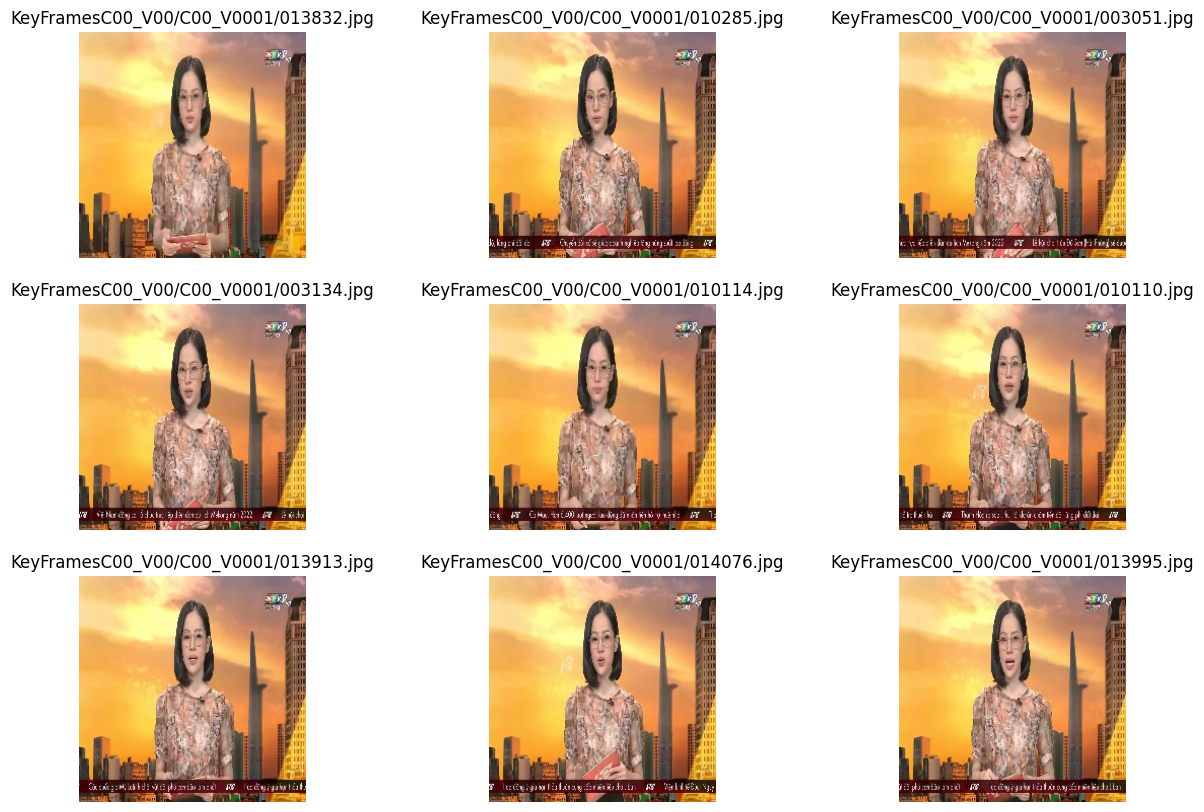

In [26]:
show_images(img_arr)